# A/B Test #1

In [13]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [14]:
df = pd.read_csv('Downloads/archive (6)/marketing_AB.csv')
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [15]:
df.dtypes

Unnamed: 0        int64
user id           int64
test group       object
converted          bool
total ads         int64
most ads day     object
most ads hour     int64
dtype: object

#### convert all non-quant vars to cat to create dummies

In [20]:
df['most ads hour'] = df['most ads hour'].astype('object')

In [22]:
df['converted'] = df['converted'].astype('object')

In [23]:
df.dtypes

Unnamed: 0        int64
user id           int64
test group       object
converted        object
total ads         int64
most ads day     object
most ads hour    object
dtype: object

In [24]:
# checl for dups
df['user id'].duplicated().sum()

0

In [50]:
df.head()

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14


In [29]:
df.drop(columns=['Unnamed: 0', 'user id'], axis = 1, # meaning drop cols not rows, 
        inplace=True) # inplace = true edit the df itself, no need to create a new copy

In [30]:
num_features = df.select_dtypes(exclude="object").columns
cat_features = df.select_dtypes(include="object").columns

In [39]:
cat_features = df[['test group', 'converted', 'most ads day', 'most ads hour']]

In [40]:
cat_features.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [43]:
for i in cat_features.columns:
    print(i, ":", cat_features[i].unique())

test group : ['ad' 'psa']
converted : [False True]
most ads day : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
most ads hour : [20 22 18 10 14 13 19 11 12 16 21 3 23 4 8 0 2 15 1 6 17 7 9 5]


# Univariate Analysis

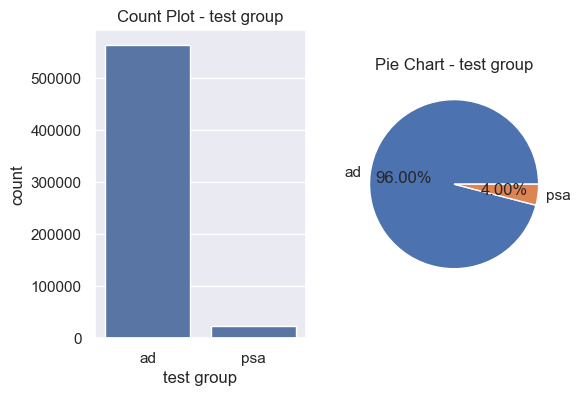

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

variable = 'test group'

plt.figure(figsize=(6, 4))
# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=cat_features)
plt.title(f'Count Plot - {variable}')

# Pie chart
plt.subplot(1, 2, 2)
counts = cat_features[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

# Adjust layout
#plt.tight_layout()

# Show the plots
plt.show()

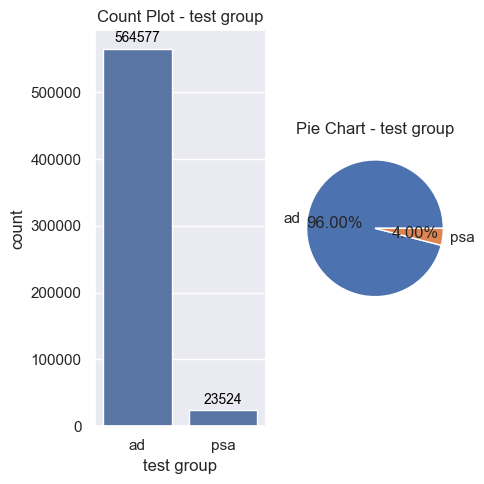

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

variable = 'test group'

plt.figure(figsize=(5, 5))
# Count plot
plt.subplot(1, 2, 1)
ax = sns.countplot(x=variable, data=cat_features)
plt.title(f'Count Plot - {variable}')

# Add exact numbers to the bar graph
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Pie chart
plt.subplot(1, 2, 2)
counts = cat_features[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


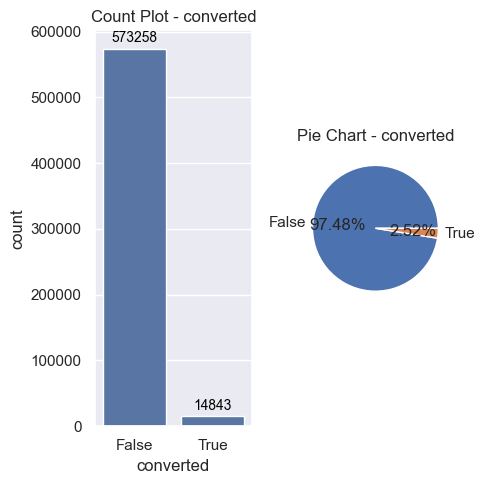

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

variable = 'converted'

plt.figure(figsize=(5, 5))
# Count plot
plt.subplot(1, 2, 1)
ax = sns.countplot(x=variable, data=cat_features)
plt.title(f'Count Plot - {variable}')

# Add exact numbers to the bar graph
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Pie chart
plt.subplot(1, 2, 2)
counts = cat_features[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

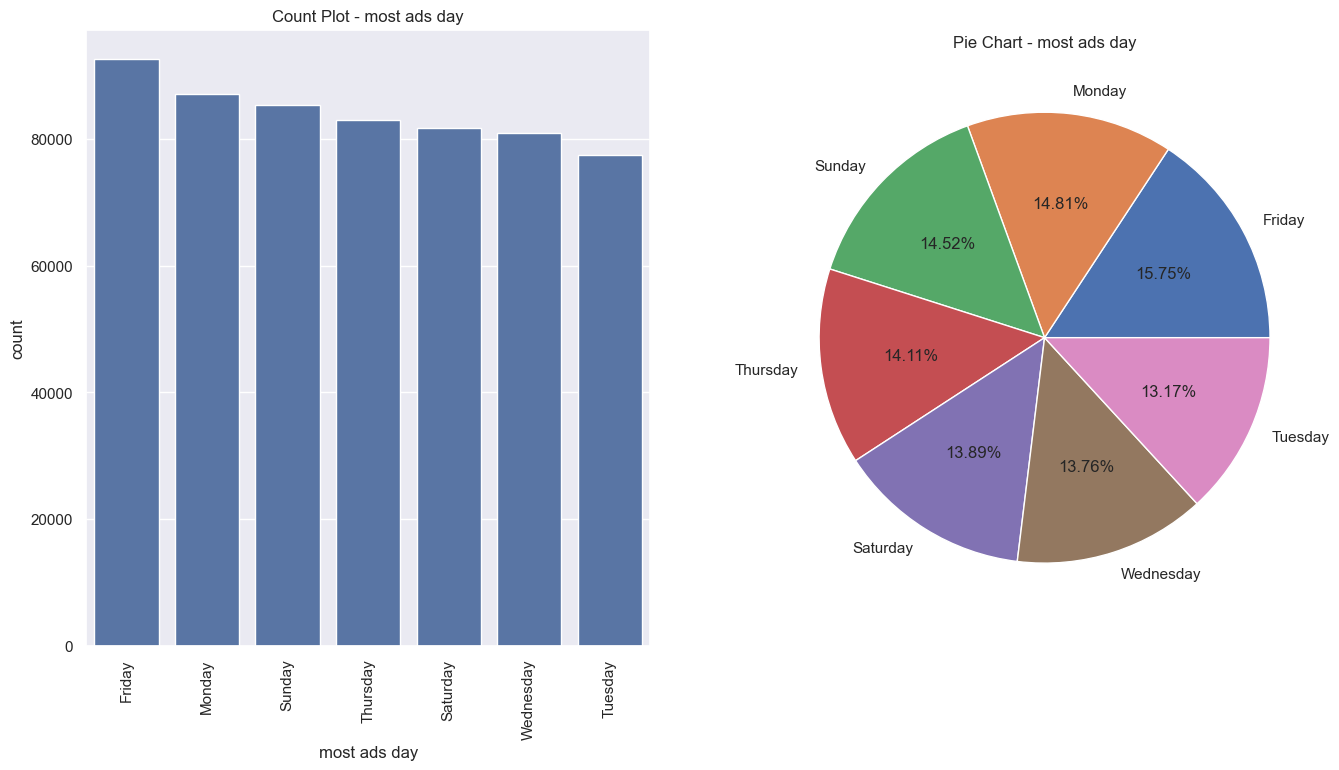

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

variable = 'most ads day'

plt.figure(figsize=(16, 8))
# Count plot
plt.subplot(1, 2, 1)
ax = sns.countplot(x=variable, data=cat_features, order=cat_features['most ads day'].value_counts().index)
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation=90)

# Pie chart
plt.subplot(1, 2, 2)
counts = cat_features[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

# Adjust layout
#plt.tight_layout()

# Show the plots
plt.show()


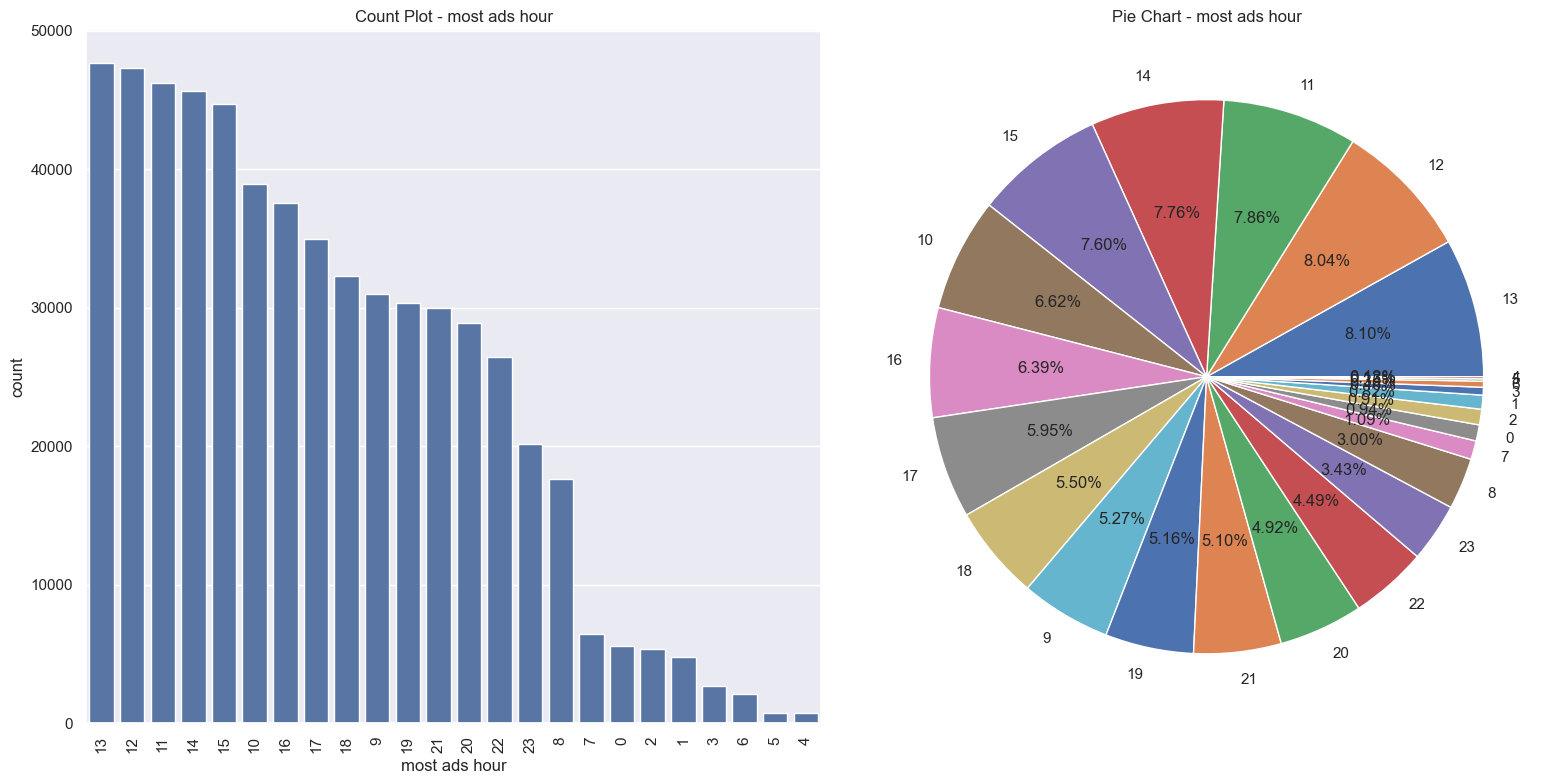

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

variable = 'most ads hour'

plt.figure(figsize=(16, 8))
# Count plot
plt.subplot(1, 2, 1)
ax = sns.countplot(x=variable, data=cat_features, order=cat_features['most ads hour'].value_counts().index)
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation=90)

# Pie chart
plt.subplot(1, 2, 2)
counts = cat_features[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

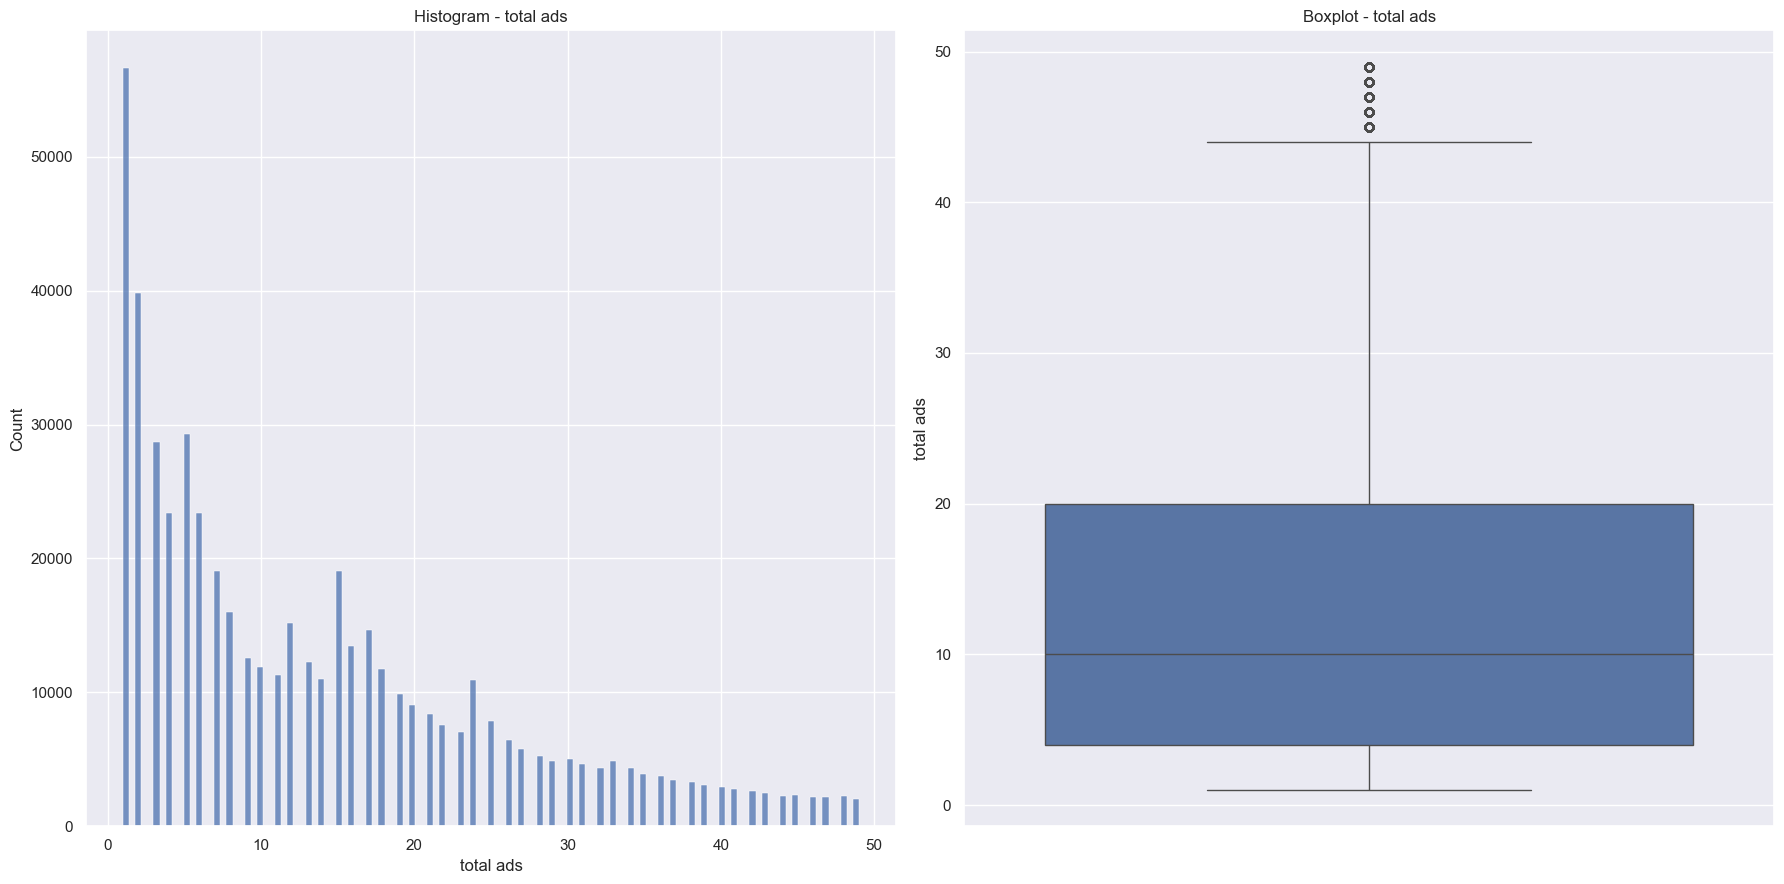

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

variable = 'total ads'

plt.figure(figsize=(18, 9))
# Histogram
plt.subplot(1, 2, 1)
# Filtering the data for a value close to 75th percentile only for better visualization
sns.histplot(x=variable, data=df[df['total ads'] < 50])
plt.title(f'Histogram - {variable}')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(y=variable, data=df[df['total ads'] < 50])
plt.title(f'Boxplot - {variable}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


### Bivariate analysis

In [64]:
# Displaying the columns of the dataframe
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [67]:
# Crosstab for 'test group' and 'converted'
ct_conversion_test_group = pd.crosstab(df['test group'], df['converted'], normalize='index')
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


<Axes: xlabel='test group'>

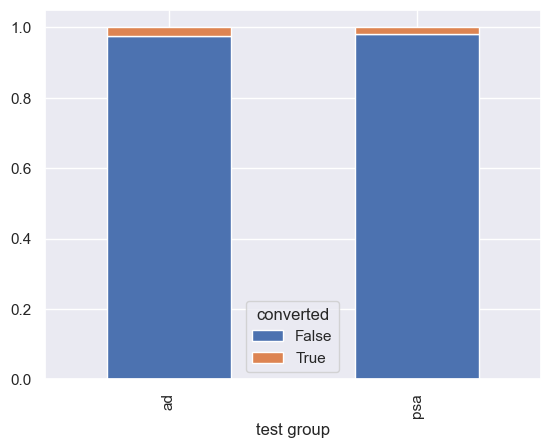

In [68]:
# Plotting the crosstab result
ct_conversion_test_group.plot.bar(stacked=True)

In [70]:
# Crosstab for 'most ads day' and 'converted'
ct_conversion_day = pd.crosstab(df['most ads day'], df['converted'], normalize='index')
ct_conversion_day

converted,False,True
most ads day,,
Friday,0.977788,0.022212
Monday,0.967188,0.032812
Saturday,0.978949,0.021051
Sunday,0.975524,0.024476
Thursday,0.978429,0.021571
Tuesday,0.970160,0.029840
Wednesday,0.975058,0.024942


In [71]:
print(ct_conversion_day.sort_values(by=True, ascending=False))

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


<Axes: xlabel='most ads day'>

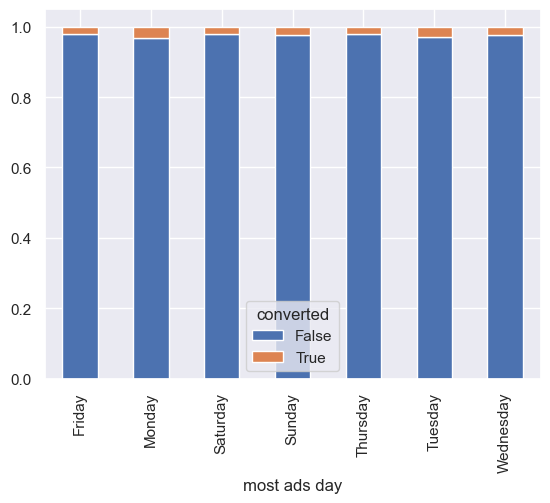

In [72]:
ct_conversion_day.plot.bar(stacked=True)

In [77]:
# Crosstab for 'most ads hour' and 'converted'
ct_conversion_hour = pd.crosstab(df['most ads hour'], df['converted'], normalize='index')
print(ct_conversion_hour.sort_values(by=True, ascending=False))

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


<Axes: xlabel='most ads hour'>

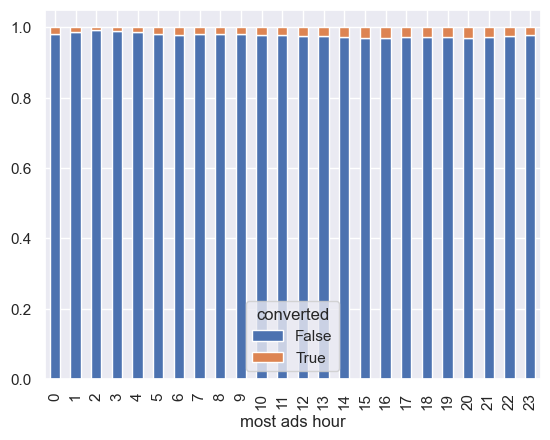

In [78]:
ct_conversion_hour.plot.bar(stacked=True)

<Axes: xlabel='converted', ylabel='total ads'>

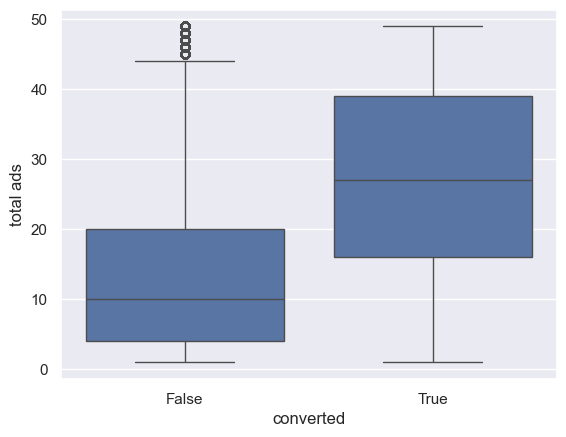

In [80]:
# Box plots
sns.boxplot(x='converted', y='total ads', data=df[df['total ads'] < 50])

### Statistical Tests

In [81]:
from scipy.stats import chi2_contingency

In [93]:
df.head()

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14


In [94]:
alpha = 0.05
for variable in cat_features.columns:
    if variable != 'converted':
        # Create a contingency table (cross-tabulation)
        contingency_table = pd.crosstab(cat_features[variable], cat_features['converted'])
        
        # Perform chi-squared test
        chi2, p, _, _ = chi2_contingency(contingency_table)
        
        # Display the results
        print(f"\nChi-squared test for {variable} vs. converted:")
        print(f"Chi-squared value: {chi2}")
        print(f"P-value: {p}")
        
        # Check for significance
        if p < alpha:
            print(f"The difference in conversion rates across {variable} is statistically significant.")
        else:
            print(f"There is no significant difference in conversion rates across {variable}.")



Chi-squared test for test group vs. converted:
Chi-squared value: 54.005823883685245
P-value: 1.9989623063390075e-13
The difference in conversion rates across test group is statistically significant.

Chi-squared test for most ads day vs. converted:
Chi-squared value: 410.0478857936585
P-value: 1.932184379244731e-85
The difference in conversion rates across most ads day is statistically significant.

Chi-squared test for most ads hour vs. converted:
Chi-squared value: 430.76869230822086
P-value: 8.027629823696771e-77
The difference in conversion rates across most ads hour is statistically significant.


In [92]:
cat_features.head()

,test group,converted,most ads day,most ads hour
0,ad,False,Monday,20
1,ad,False,Tuesday,22
2,ad,False,Tuesday,18
3,ad,False,Tuesday,10
4,ad,False,Friday,14


In [90]:
for var in cat_features.columns:
    if var != 'converted':
        crosstab_ = pd.crosstab(cat_features[var], cat_features['converted'])
        chi2, p_value, _, _ = chi2_contingency(crosstab_)
        # Display the results
        print(f"\nChi-squared test for {var} vs. converted:")
        print(f"Chi-squared value: {chi2}")
        print(f"P-value: {p_value}")
        
        # Check for significance
        if p_value < alpha:
            print(f"The difference in conversion rates across {var} is statistically significant.")
        else:
            print(f"There is no significant difference in conversion rates across {var}.")


Chi-squared test for test group vs. converted:
Chi-squared value: 54.005823883685245
P-value: 1.9989623063390075e-13
The difference in conversion rates across test group is statistically significant.

Chi-squared test for most ads day vs. converted:
Chi-squared value: 410.0478857936585
P-value: 1.932184379244731e-85
The difference in conversion rates across most ads day is statistically significant.

Chi-squared test for most ads hour vs. converted:
Chi-squared value: 430.76869230822086
P-value: 8.027629823696771e-77
The difference in conversion rates across most ads hour is statistically significant.


In [96]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

In [97]:
# Step 1: Check Assumptions
# Normality assumption
shapiro_stat_true, shapiro_p_value_true = shapiro(df[df['converted'] == True]['total ads'])
shapiro_stat_false, shapiro_p_value_false = shapiro(df[df['converted'] == False]['total ads'])

print(f"Shapiro-Wilk test for normality (True group): p-value = {shapiro_p_value_true}")
print(f"Shapiro-Wilk test for normality (False group): p-value = {shapiro_p_value_false}")

# Equality of variances assumption
levene_stat, levene_p_value = levene(df[df['converted'] == True]['total ads'], df[df['converted'] == False]['total ads'])
print(f"Levene's test for equality of variances: p-value = {levene_p_value}")

C:\Users\abdul\anaconda3\envs\ISLP\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk test for normality (True group): p-value = 0.0
Shapiro-Wilk test for normality (False group): p-value = 0.0
Levene's test for equality of variances: p-value = 0.0


he Shapiro-Wilk test is a statistical test used to assess whether a dataset is normally distributed. It is particularly useful when working with smaller sample sizes and can be used to determine if the assumption of normality holds for your data.

Interpretation of Shapiro-Wilk Test Results:

p-value: The result of the Shapiro-Wilk test is a p-value, which is used to decide whether to reject or fail to reject the null hypothesis.
If p-value > alpha (where alpha is usually 0.05), you fail to reject the null hypothesis. This means there is no significant evidence to say that the data is not normally distributed, so you can assume it is normally distributed.
If p-value ≤ alpha, you reject the null hypothesis, meaning the data is not normally distributed.

the continuous variable 'total ads' for both groups (those who converted - true; and those who did not - false), we reject the null hypothesis, and thus the variable is not noramlly distributed

The Levene test is a statistical test used to check if two or more groups have equal variances. It is used to test the assumption of homogeneity of variances, which is an important requirement for many statistical tests, such as the t-test and ANOVA.

How the Levene Test Works:

The null hypothesis for the Levene test states that all groups have equal variances.
The alternative hypothesis states that at least one group has a variance that is significantly different from the others.

In [101]:
from scipy.stats import kstest

# Perform K-S test for normality for large datasets
ks_stat_true, ks_p_value_true = kstest(df[df['converted'] == True]['total ads'], 'norm')
ks_stat_false, ks_p_value_false = kstest(df[df['converted'] == False]['total ads'], 'norm')
print(f"K-S test for normality (True group): p-value = {ks_p_value_true}")
print(f"K-S test for normality (False group): p-value = {ks_p_value_false}")

K-S test for normality (True group): p-value = 0.0
K-S test for normality (False group): p-value = 0.0


'total ads' is not normally distributed

In [103]:
# Step 2: Perform a Suitable Test
if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha:
    # Assumptions are met - use t-test for means
    t_stat, t_p_value = ttest_ind(df[df['converted'] == True]['total ads'], df[df['converted'] == False]['total ads'])
    print(f"Independent two-sample t-test: p-value = {t_p_value}")
else:
    # Assumptions not met - use Mann-Whitney U test for medians
    u_stat, u_p_value = mannwhitneyu(df[df['converted'] == True]['total ads'], df[df['converted'] == False]['total ads'])
    print(f"Mann-Whitney U test: p-value = {u_p_value}")

Mann-Whitney U test: p-value = 0.0


<Axes: xlabel='converted', ylabel='total ads'>

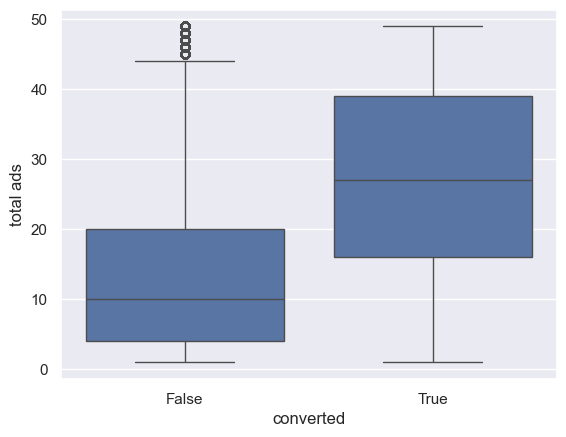

In [104]:
# this graph confirms the results of the mann-whitney test of medians
sns.boxplot(x='converted', y='total ads', data=df[df['total ads'] < 50])

The difference in conversion rates between the groups is highly statistically significant (p-value = 0.0). This indicates that there is a strong difference in 'total ads' between the converted and non-converted groups. Based on this result, it is recommended to increase the number of times an ad is shown to 25 times per customer to increase conversion rate, 
as it suggests a meaningful impact on conversion.")

In [4]:
# Another way to one-hot encode all categorical vars in one step
df = pd.get_dummies(data=df, drop_first=True, dtype=int)
df.head()

,Unnamed: 0,user id,converted,total ads,most ads hour,test group_psa,most ads day_Monday,most ads day_Saturday,most ads day_Sunday,most ads day_Thursday,most ads day_Tuesday,most ads day_Wednesday
0,0,1069124,False,130,20,0,1,0,0,0,0,0
1,1,1119715,False,93,22,0,0,0,0,0,1,0
2,2,1144181,False,21,18,0,0,0,0,0,1,0
3,3,1435133,False,355,10,0,0,0,0,0,1,0
4,4,1015700,False,276,14,0,0,0,0,0,0,0


In [6]:
from sklearn.preprocessing import LabelEncoder
dummy = LabelEncoder()
df['converted'] = dummy.fit_transform(df['converted'])
df.head()

,Unnamed: 0,user id,converted,total ads,most ads hour,test group_psa,most ads day_Monday,most ads day_Saturday,most ads day_Sunday,most ads day_Thursday,most ads day_Tuesday,most ads day_Wednesday
0,0,1069124,0,130,20,0,1,0,0,0,0,0
1,1,1119715,0,93,22,0,0,0,0,0,1,0
2,2,1144181,0,21,18,0,0,0,0,0,1,0
3,3,1435133,0,355,10,0,0,0,0,0,1,0
4,4,1015700,0,276,14,0,0,0,0,0,0,0


############################################################################################################################################

# A/B Test #2

Part 2: About Data

2.1 Load the AB-test data

In [111]:
import pandas as pd
df = pd.read_csv('Downloads/archive (7)/cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


The data is from 90,189 players that installed the game while the AB-test was running. The variables are:

userid - a unique number that identifies each player.
version - whether the player was put in the control group (gate_30 - a gate at level 30) or the test group (gate_40 - a gate at level 40).
sum_gamerounds - the number of game rounds played by the player during the first week after installation
retention_1 - did the player come back and play 1 day after installing?
retention_7 - did the player come back and play 7 days after installing?
When a player installed the game, he or she was randomly assigned to either gate_30 or gate_40.

In [112]:
# 2.3 checking data info and missing values:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [113]:
df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

2.3 Count the number of players in each group¶

In [116]:
df.groupby(df['version']).count()
# When a player installed the game, he or she was randomly assigned to either gate_30 or gate_40. The number of players is roughly the same in the control and test group

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


## Part 3. Analyzing Player Behavior ¶
Plot a boxplot to visualize the distribution of 'sum_gamerounds', which would give us a rough idea of how many game rounds were played by a player during the first week after installing the game.

<Axes: >

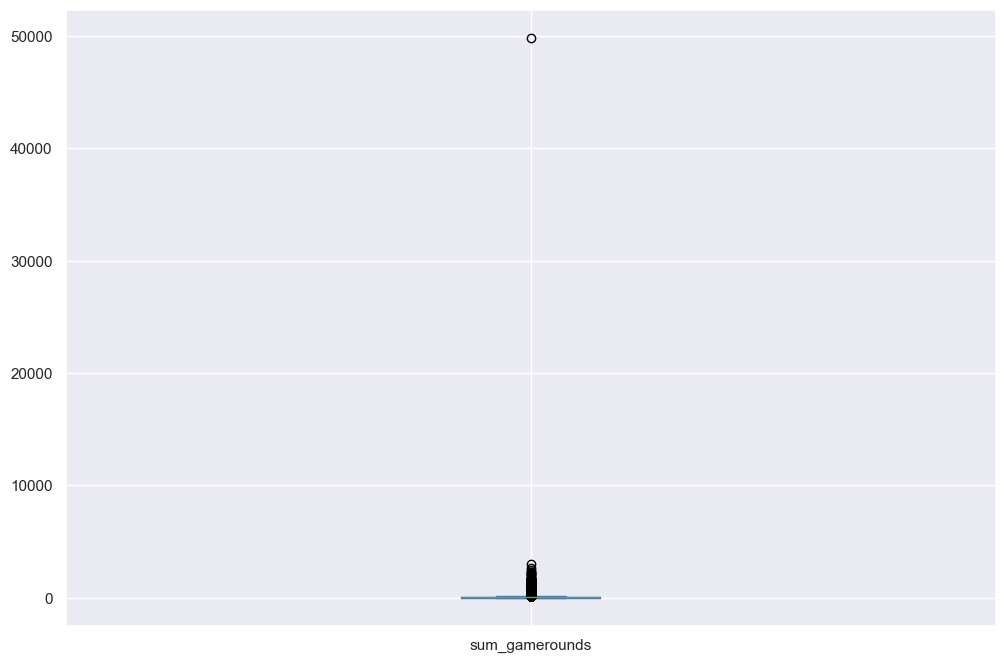

In [127]:
df['sum_gamerounds'].plot.box(figsize=(12,8))

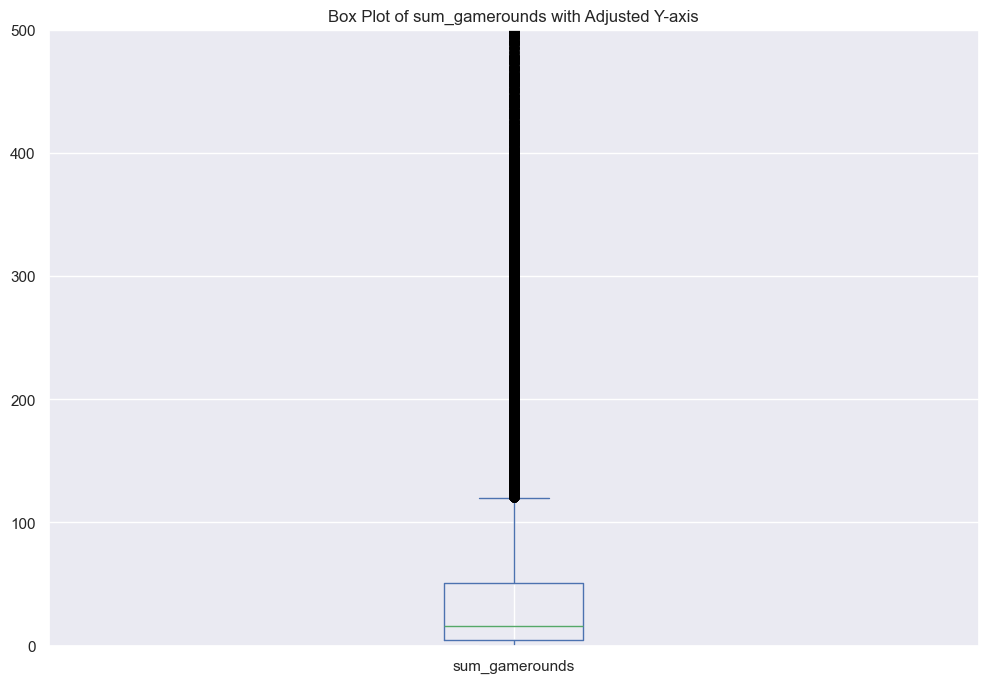

In [131]:
# Adjust y-axis range to improve interpretability
plt.figure(figsize=(12, 8))
df['sum_gamerounds'].plot.box()
plt.ylim(0, 500)  # Adjust y-axis range
plt.title('Box Plot of sum_gamerounds with Adjusted Y-axis')
plt.show()


In [132]:
df['sum_gamerounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

In [135]:
# Counting the number of players for each number of gamerounds 
plot_df = df.groupby('sum_gamerounds')['userid'].count()
plot_df

sum_gamerounds
0        3994
1        5538
2        4606
3        3958
4        3629
         ... 
2294        1
2438        1
2640        1
2961        1
49854       1
Name: userid, Length: 942, dtype: int64

As we can see, 50% of players played fewer than 16 game rounds during the first week after installation, and 75% of players played fewer than 51 rounds.

Nearly 4000 players did not even play a single round after installation. Possible reasons may include:

They downloaded a number of new games at the same time and were attracted by other games.
They opened the app but did not like the design/interface/music, so they quit even before playing the game.
They have not started playing the game yet.
......
Another number worth attention is that more than 14,000 players played fewer than three rounds. For these players, the reasons for leaving may include:

They did not enjoy the game. (This is probably the most common reason).
The game turned out to be different from what they expected.
The game was too easy and they got bored of it.
......
It is important to understand why a large number of players quit the game at an early stage. Tactile Entertainment can try to collect player feedback, for example, through an in-app survey.



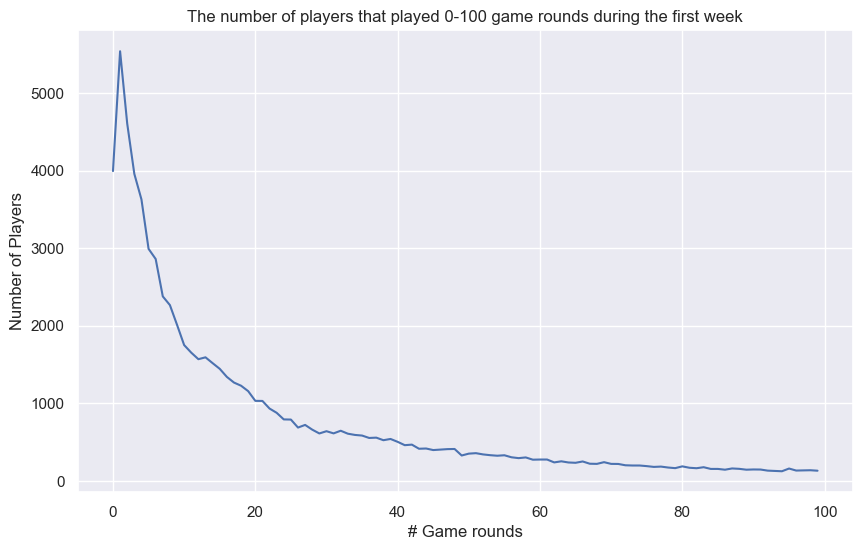

In [143]:
# Plot the distribution of players that played 0 to 100 game rounds during their first week playing the game.
%matplotlib inline

ax = plot_df[:100].plot(figsize=(10,6))
ax.set_title("The number of players that played 0-100 game rounds during the first week")
ax.set_ylabel("Number of Players")
ax.set_xlabel('# Game rounds')
plt.show()

The distribution is highly skewed, with a long tail on the right. A huge number of players played fewer than 20 rounds and left the game. For rounds greater than 60, the number of players stayed steady at about 300.

## Part 4. Comparing 1-day Retention 

In the plot above we can see that some players install the game but then never play it, some players just play a couple of game rounds in their first week, and some get really hooked! What we want is for players to like the game and to get hooked.

A common metric in the video gaming industry for how fun and engaging a game is 1-day retention: the percentage of players that comes back and plays the game one day after they have installed it. The higher 1-day retention is, the easier it is to retain players and build a large player base.

In [148]:
# When using .sum(), T/F will first be converted to 1/0.
(df['retention_1'].sum() / df['userid'].count()).round(4)

0.4452

In [151]:
(df['retention_7'].sum() / df['userid'].count()).round(4)

0.1861

In [154]:
df['retention_1'].mean().round(5)

0.44521

In [155]:
# 1-day retention for each AB-group¶
df.groupby('version')['retention_1'].mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

In [157]:
df.groupby('version')['retention_7'].mean()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

It appears that there was a slight decrease in 1-day retention when the gate was moved to level 40 (44.2%) compared to the control when it was at level 30 (44.8%). It's a small change, but even small changes in retention can have a large impact. But while we are certain of the difference in the data, how certain should we be that a gate at level 40 will be worse in the future?

There are a couple of ways we can get at the certainty of these retention numbers. Here we will use bootstrapping: We will repeatedly re-sample our dataset (with replacement) and calculate 1-day retention for those samples. The variation in 1-day retention will give us an indication of how uncertain the retention numbers are.

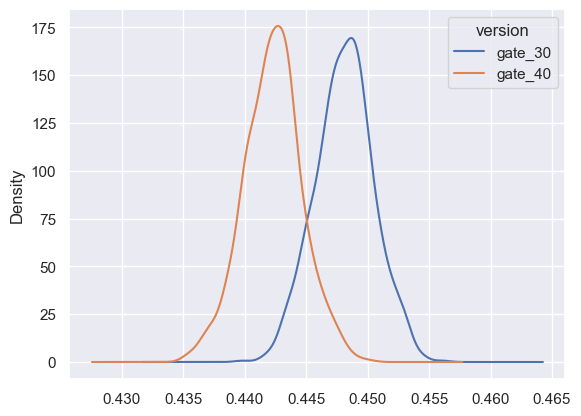

In [161]:
# Bootstrapping: Should we be confident in the difference?¶
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(1000):
    boot_mean = df.sample(frac = 1, replace = True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')
plt.show()

In [162]:
boot_1d

version,gate_30,gate_40
retention_1,0.448705,0.442806
retention_1,0.445060,0.436684
retention_1,0.447767,0.442706
retention_1,0.448577,0.443168
retention_1,0.447349,0.442779
...,...,...
retention_1,0.446957,0.443558
retention_1,0.451357,0.441548
retention_1,0.447988,0.438201
retention_1,0.451013,0.439320


In [ ]:
#Adding a column with the % difference between the two AB-groups
boot_1d['diff'] = (boot_1d.gate_30 - boot_1d.gate_40)/boot_1d.gate_40*100

# Ploting the bootstrap % difference
ax = boot_1d['diff'].plot(kind='density')

# Calculating the probability that 1-day retention is greater when the gate is at level 30
print('Probability that 1-day retention is greater when the gate is at level 30:',(boot_1d['diff'] > 0).mean())

In [164]:
boot_1d['diff'] = (boot_1d['gate_30'] - boot_1d['gate_40']) * boot_1d['gate_40'] * 100
boot_1d

version,gate_30,gate_40,diff
retention_1,0.448705,0.442806,0.261211
retention_1,0.445060,0.436684,0.365762
retention_1,0.447767,0.442706,0.224046
retention_1,0.448577,0.443168,0.239731
retention_1,0.447349,0.442779,0.202337
...,...,...,...
retention_1,0.446957,0.443558,0.150797
retention_1,0.451357,0.441548,0.433097
retention_1,0.447988,0.438201,0.428906
retention_1,0.451013,0.439320,0.513714


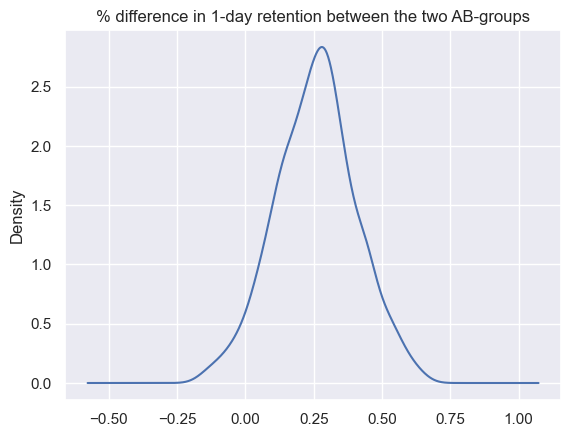

In [167]:
ax = boot_1d['diff'].plot(kind='density')
ax.set_title('% difference in 1-day retention between the two AB-groups')
plt.show()

In [168]:
# Calculating the probability that 1-day retention is greater when the gate is at level 30
print('Probability that 1-day retention is greater when the gate is at level 30:',(boot_1d['diff'] > 0).mean())

Probability that 1-day retention is greater when the gate is at level 30: 0.954


In [171]:
boot_1d['diff'].mean().round(3)

0.257

In [180]:
(boot_1d['diff'] > 0).mean()

0.954